In [4]:
import qutip as qt 
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# 第一次作业
1. 求 $[a^\dagger, a^n]$
2. 证明 $[a^\dag, f(a,a^\dag)] = -\frac{\partial f}{\partial a}$

解：
1. 利用 $[a_k,a^\dagger_{k'}] = \delta_{kk'}$, $k,k'$ for modes. 
   利用($[A,BC]=[A,B]C+B[A,C]$)迭代得到：
   $$
   \begin{aligned}
      f(n)&=[a^\dagger,a^{n}] = [a^\dagger, a]a^{n-1}+a[a^\dagger, a^{n-1}] \\
      &= -a^{n-1}+af(n-1) \\
      f(n)&= -na^{n-1} = -\frac{\partial}{\partial a}a^n \\
   \end{aligned}
   $$
   或是数学归纳法亦可。
2. $[a^\dagger, a^{\dagger n}]=0$，因此对于 $f(a,a^\dagger) = \sum_{n,m}c_{nm}a^{\dagger m}a^{n}$ 由 $[a^\dagger, f]=-\frac{\partial f}{\partial a}$

(<Figure size 576x432 with 2 Axes>, <AxesSubplot:>)

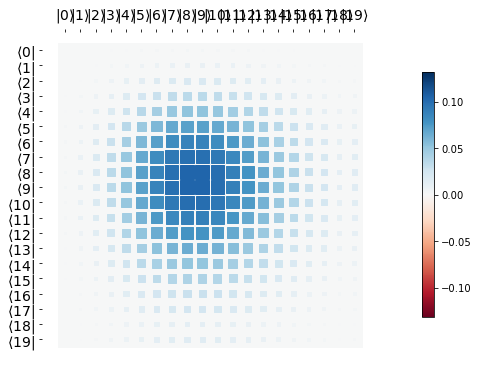

In [9]:
# 相干态的密度矩阵
N = 20
qt.hinton(qt.coherent_dm(N,3)) # <n> = 9

(<Figure size 576x432 with 2 Axes>, <AxesSubplot:>)

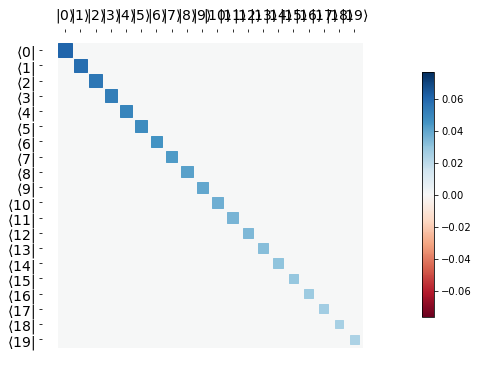

In [14]:
# thermal state 的密度矩阵
qt.hinton(qt.thermal_dm(N,20)) 

# 第二次作业
1. 求单模热光场的平均光子数
2. 验证平移算符的性质 (1) $D(\alpha)^\dagger = D(-\alpha) = D(\alpha)^{-1}$ (2) $D(\alpha)^\dagger a D(\alpha) = a+\alpha$
3. 验证 $a^\dagger |\alpha\rangle\langle\alpha| = (\alpha^*+\frac{\partial}{\partial \alpha})|\alpha\rangle\langle\alpha|$ 以及 $|\alpha\rangle\langle\alpha|a = (\alpha+\frac{\partial}{\partial \alpha^*})|\alpha\rangle\langle\alpha|$ 

1. 单模热光场 
   $$
   \begin{aligned}
       \rho &= \frac{1}{\mathcal{N}}\sum_n e^{-\frac{n\hbar \omega}{kT}}|n\rangle\langle n|,\quad \text{with}\quad \mathcal{N} = (1-e^{-\frac{\hbar \omega}{kT}})^{-1}\\
       \langle \hat{n}\rangle &= \sum_n nP(n) = \frac{e^{-\frac{\hbar \omega}{kT}}}{1-e^{-\frac{\hbar \omega}{kT}}} 
   \end{aligned}
   $$
2. Displacement operator $D(\alpha) = \exp(\alpha a^\dagger-\alpha^* a)$
   $$
   D(\alpha) = e^{-|\alpha|^2/2}e^{\alpha a^\dagger} e^{-\alpha^* a}
   $$
   性质一类似定义式，也可以由上式推导出来。
   
   2-2 利用
   $$
   e^{\xi B}Ae^{-\xi B} = A + \xi[B,A] + \frac{\xi^2}{2!}[B,[B,A]] + \dots
   $$

思考：Displacement operator $D(\alpha)$ 和 Translation operator $T(x)$ 的关系:
Tanslation operator: 
$$
\begin{aligned}
    &T(x)|r\rangle = |r+x\rangle, \quad T(x)\psi(r) = \langle r|T(x)|\psi\rangle = \psi(r-x) \\
    \Longrightarrow\quad & T(x) = \exp(-ix\hat{p}/\hbar), \quad T(x_1)T(x_2) = T(x_1+x_2)
\end{aligned}
$$
if $\alpha$ is real, $D(\alpha) = exp(\alpha(a^\dagger-a)) = \exp(-i\alpha \hat{Y})$ same with translation operator. 

**Displacement operator is complex expantion of translation operator; and addition is not satisfied:**
$$
D(\alpha + \beta) = D(\alpha)D(\beta) \exp\big(-iIm(\alpha\beta^*)\big) 
$$
因此有
$$
|\langle \beta|\alpha\rangle|^2 = e^{-|\beta-\alpha|^2}
$$

3. 利用 $|\alpha\rangle = D(\alpha)|0\rangle = e^{-|\alpha|^2/2}e^{\alpha a^\dagger}|0\rangle$ 有 $|\alpha\rangle\langle \alpha | = e^{-|\alpha|^2}e^{\alpha a^\dagger}|0\rangle\langle 0|e^{\alpha^* a}$
   
   因此，
   $$
   \frac{\partial}{\partial \alpha}(|\alpha\rangle\langle \alpha|) = (a^\dagger - \alpha^*) |\alpha\rangle \langle\alpha|
   $$
   其他同理可证。

# 第三次作业
1. 对于相干态，探测器效率$\eta$，求探测概率 
2. 求单模热光场的Q表示
3. 求Wigner表象和P表象的关系

1. $\rho = |\alpha\rangle\langle\alpha|$ 有 $P(n) = \rho_{n,n} = |\langle n|\alpha\rangle|^2 = \frac{|\alpha|^{2n}e^{-|\alpha|^2}}{n!} = e^{-\bar{n}}\frac{\bar{n}^n}{n!}$
   $$
   \begin{aligned}
      P_m &= \sum_{n} \rho_{n,n} \frac{\eta^m}{m!} \bigg\langle n\bigg|\sum_{l=0}^\infty \frac{\eta^l}{l!}a^{\dagger (m+l)}a^{m+l}\bigg|n\bigg\rangle \\
      & = \sum_{n=m}^\infty \rho_{n,n}\binom{n}{m}\eta^{m}(1-\eta)^{n-m}
   \end{aligned}
   $$
   由上可知，若希望 $P_m = \rho_{m,m}$ 只有当 $\eta=1$ 时才可以。
   
   代入相干态可以得到：
   $$
   P_m = \frac{(\eta|\alpha^2|)^m}{m!}e^{-\eta |\alpha|^2} = \frac{(\eta\bar{n})^m}{m!}e^{-\eta \bar{n}}
   $$

   其他情况，如 chaotic light，$\rho_{n,n} = \frac{\bar{n}^n}{(1+\bar{n})^{(1+n)}}$, 它的 $P_m = \frac{(\eta\bar{n})^m}{(1+\eta\bar{n})^{(1+m)}}$

   详见，《Quantum Optics (D.F.Walls)》p51, 公式(3.112) 到 公式(3.117)


2. 常见光场的Q表示，$Q(\alpha) = \frac{\langle\alpha|\rho|\alpha\rangle}{\pi}$
   $$
   \begin{aligned}
      \text{coherent state}|\beta\rangle\quad & Q(\alpha) = \frac{|\langle\alpha|\beta\rangle|^2}{\pi} = \frac{e^{-|\alpha-\beta|^2}}{\pi} \\
      \text{Fock state}|n\rangle\quad & Q(\alpha) = \frac{|\langle\alpha|n\rangle|^2}{\pi} = \frac{|\alpha|^{2n}e^{-|\alpha|^2}}{\pi n!} \\
      \text{thermal field}\quad & Q(\alpha) = \frac{1}{\mathcal{Z}}\sum_{n}e^{-\beta\omega n}\frac{|\alpha|^{2n}e^{-|\alpha|^2}}{\pi n!} = \frac{1}{\pi\mathcal{Z}} e^{-|\alpha|^2}\exp\big(|\alpha|^2e^{-\beta\omega}\big)
   \end{aligned}
   $$

Q function 的一些性质：
$$
Q(\alpha)\ge 0 \quad\text{and}\quad Q(\alpha)\le \frac{1}{\pi}
$$
$$
\langle a^n a^{\dagger m}\rangle = \int \alpha^n\alpha^{*m}Q(\alpha,\alpha^*)d^2\alpha
$$

3. 三种表象之间的关系 P,Q and W.
   
   define character function:
   $$
   \begin{cases}
       \chi(\eta) = Tr\{\rho e^{\eta a^\dagger-\eta^* a}\} \\
       \chi_N(\eta) = Tr\{\rho e^{\eta a^\dagger}e^{-\eta^* a}\},\quad \text{normal order}\\
       \chi_A(\eta) = Tr\{\rho e^{-\eta^* a}e^{\eta a^\dagger}\},\quad \text{anti-normal order}
   \end{cases}
   $$
   then, the representations equal:
   $$
   \begin{cases}
       W(\alpha) = \frac{1}{\pi^2}\int e^{(\eta^*\alpha - \alpha^*\eta)}\chi(\eta) d^2\eta \\
       P(\alpha) = \frac{1}{\pi^2}\int e^{(\eta^*\alpha - \alpha^*\eta)}\chi_N(\eta) d^2\eta \\
       Q(\alpha) = \frac{1}{\pi^2}\int e^{(\eta^*\alpha - \alpha^*\eta)}\chi_A(\eta) d^2\eta
   \end{cases}
   $$
   Wigner function is Gaussian convulution of P function
   $$
   W(\alpha) = \frac{2}{\pi}\int P(\beta) e^{-(-2|\beta-\alpha|^2)}d^2\beta
   $$
   For Q and P function we have:
   $$
   Q(\alpha) = \frac{1}{\pi}\int P(\beta) e^{-|\alpha-\beta|^2}d^2\beta
   $$
   证明见 《Quantum Optics (D.F.Walls)》p.63-p.66

## 补充 Wigner Function 作为准概率
详见《相空间中的量子光学》

$$
W(\alpha) = W(x_1,x_2) = \frac{1}{2\pi}\int_{-\infty}^{\infty} e^{-ix x_2}\langle x_1+x|\rho|x_1-x\rangle
$$
其中，$x_1 = \alpha+\alpha^*$，$x_2 = -1(\alpha-\alpha^*)$ 
有时也写作 x 和 p，因此也被称为**相空间**. 作为和经典相空间的对应。

相关性质：
$$
\begin{aligned}
    \int dp W(x,p) &= \langle x|\rho|x\rangle \\
    \int dx W(x,p) &= \langle p|\rho|p\rangle \\
    \int dx\int dp W(x,p)&= tr(\rho) = 1
\end{aligned}
$$
for operator $Q$, we have $q(x,p) = \int dy e^{-ipy/\hbar} \langle x-\frac{y}{2}|G|x+\frac{y}{2}\rangle$
we have,
$$
\langle Q\rangle = \iint dxdp\ W(x,p)q(x,p)
$$
motions of Wigner function (in Shordinger picture)
$$
\frac{\partial}{\partial t}W(x,p) = \frac{-p}{m}\frac{\partial W(x,p)}{\partial x}
$$

For exampel of coherent state: (in Shordinger picture)
$$
e^{-iHt/\hbar} |\alpha\rangle = |\alpha e^{-i\omega t}\rangle, \quad H = \hbar\omega(a^\dagger a+\frac{1}{2})
$$
![coherent_state](coherent_state.gif)
![coherent_state2](coherent_state2.png)

1. Wigner function 不一定正的
2. 积分的区间存在最小 pixel，最小pixie 要满足不确定性关系 即$\Delta^2 X\Delta^2P\ge\frac{\hbar}{2}$
3. 在满足不确定性关系的所有积分区间内的积分都是正的

### Gallery of Wigner Function
https://nbviewer.ipython.org/github/jrjohansson/qutip-lectures/blob/master/Lecture-16-Gallery-of-Wigner-functions.ipynb

In [53]:
def plot_wigner_2d_3d(psi):
    #fig, axes = plt.subplots(1, 2, subplot_kw={'projection': '3d'}, figsize=(12, 6))
    fig = plt.figure(figsize=(17, 8))
    
    ax = fig.add_subplot(1, 2, 1)
    qt.plot_wigner(psi, fig=fig, ax=ax, alpha_max=6);

    ax = fig.add_subplot(1, 2, 2, projection='3d')
    qt.plot_wigner(psi, fig=fig, ax=ax, projection='3d', alpha_max=6);
    
    plt.close(fig)
    return fig

### thermal state

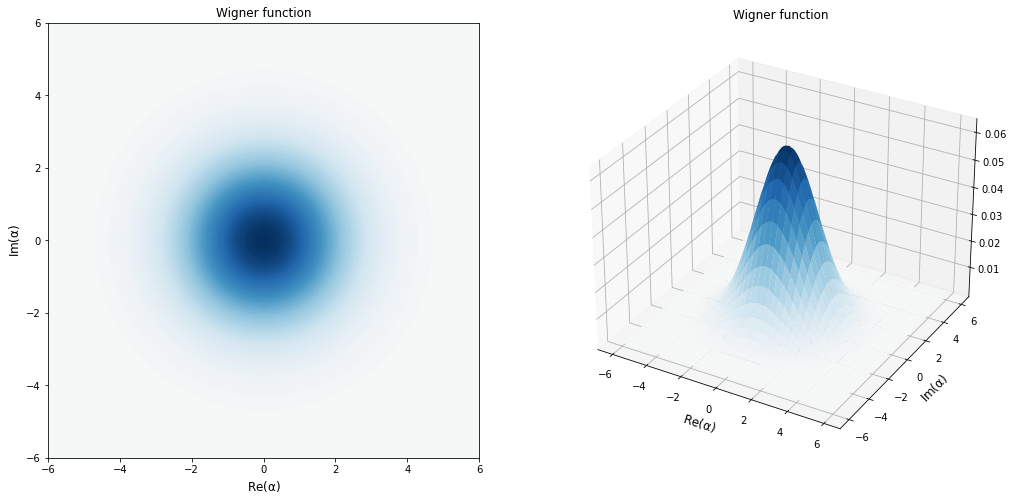

In [54]:
psi = qt.thermal_dm(N, 2)
plot_wigner_2d_3d(psi)

### Cat state
$|\psi\rangle = \frac{1}{2}(|\alpha\rangle + |-\alpha\rangle)$

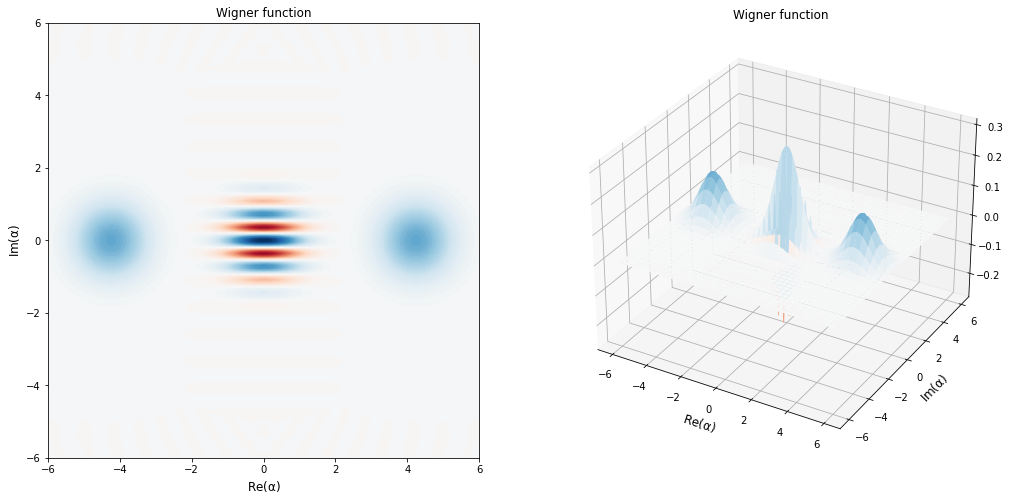

In [58]:
psi = (qt.coherent(N, -3.0) + qt.coherent(N, 3.0)) / np.sqrt(2)
plot_wigner_2d_3d(psi)

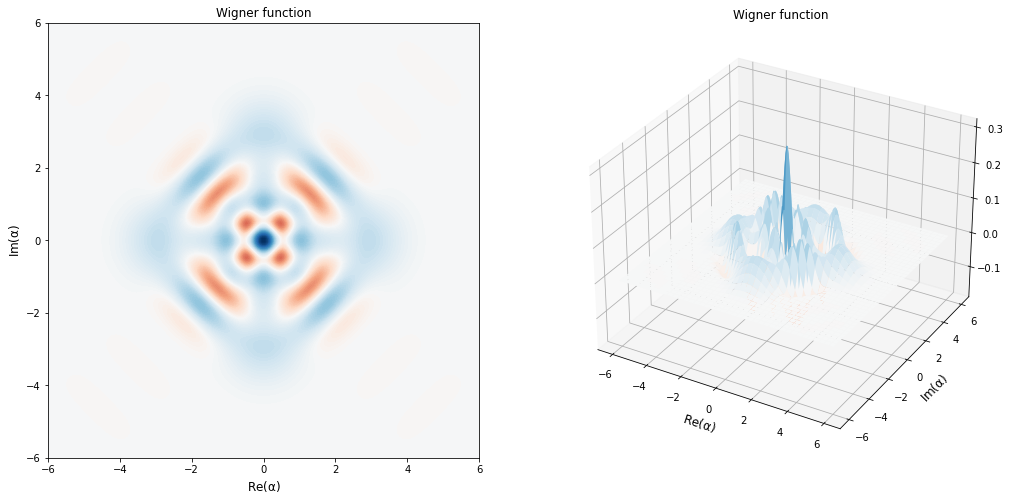

In [63]:
psi = (qt.coherent(N, -2.0) + qt.coherent(N, -2j) + qt.coherent(N, 2j) + qt.coherent(N, 2.0)).unit()
plot_wigner_2d_3d(psi)

### Fock state

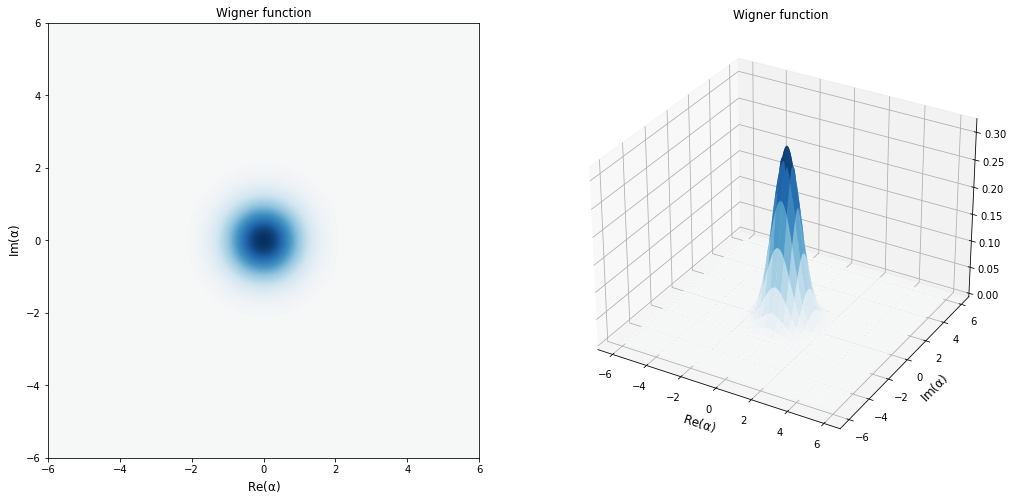

In [59]:
# |0>
psi = qt.basis(N, 0)
plot_wigner_2d_3d(psi)

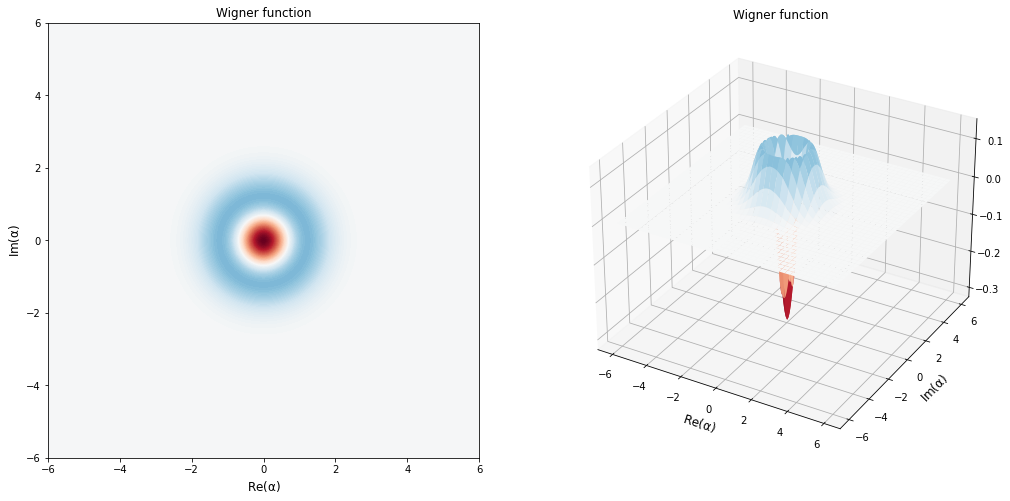

In [60]:
#|1>
psi = qt.basis(N, 1)
plot_wigner_2d_3d(psi)

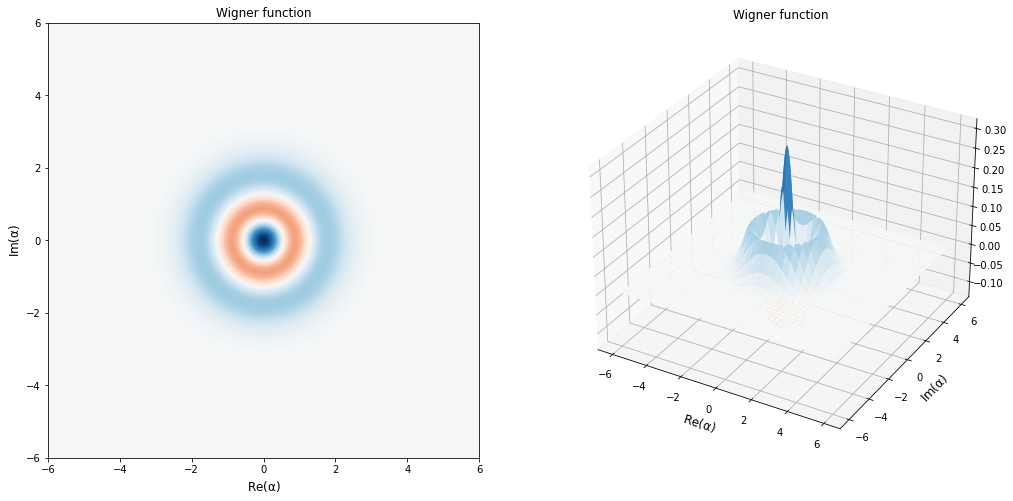

In [61]:
#|2>
psi = qt.basis(N, 2)
plot_wigner_2d_3d(psi)

# 第四次作业

### 补充1，量子力学汇景
For an operator $O$, $\langle O(t)\rangle = \langle \psi|e^{iHt/\hbar}Oe^{-iHt/\hbar}|\psi\rangle$

Schording Picture: $|\psi\rangle \rightarrow e^{-iHt/\hbar}|\psi\rangle$

Heisenberg Picture: $O\rightarrow e^{iHt/\hbar}Oe^{-iHt/\hbar}$

Interaction Picture(special case): $H = H_0+H_I$ and $[H_0,H_I]=0$ then, $e^{-iHt/\hbar} = e^{-iH_It/\hbar}e^{-iH_0t/\hbar}$
$$
\begin{cases}
    |\psi\rangle \rightarrow e^{-iH_0t\hbar}|\psi\rangle \\
    O  \rightarrow e^{iH_It/\hbar}Oe^{-iH_It/\hbar}
\end{cases}
$$
Interaction Picture(Arbitrary Case): Imposing some special $U_0$, $U_1$ into the expectation:
$$
\langle \psi|U_0^\dagger U_0^{iHt/\hbar}U_1^\dagger U_1OU_1^\dagger U_1e^{-iHt/\hbar}U_0^\dagger U_0|\psi\rangle = \langle\psi'|U_{evo}^\dagger O' U_{evo}|\psi'\rangle 
$$
with $|\psi'\rangle = U_0|\psi\rangle$ and $U_1 O U_1^\dagger = O'$ And $U_{evo} = U_1e^{-iHt/\hbar}U_0^\dagger$. 

Suppose $U_0=U_1 = e^{iAt/\hbar}$
$$
\begin{aligned}
    i\hbar\frac{\partial}{\partial t}|\psi\rangle &= H|\psi\rangle,\quad |\psi_I\rangle = U_0|\psi\rangle\\
    i\hbar\frac{\partial}{\partial t}|\psi_I\rangle &= (U_0^\dagger HU_0-A)|\psi\rangle = H_I|\psi\rangle
\end{aligned}
$$


Interaction-free scenario -- setting zero energy
$$
H = \begin{pmatrix}
    \hbar \omega_1& 0\\
    0& \hbar \omega_2\\
\end{pmatrix}
$$
suppose $U_0 = e^{-i\omega_1 t}$, then
$$
H' = U_0^\dagger H U_0 - \hbar\omega_1 = \begin{pmatrix}
    0& 0\\
    0& \hbar(\omega_2-\omega_1)
\end{pmatrix}
$$
suppose $U_0 = e^{-i(\omega_1+\omega_2)t/2\hbar}$, then
$$
H' = U_0^\dagger H U_0 - \hbar\frac{\omega_1+\omega_2}{2}= \hbar\frac{\omega_1-\omega_2}{2}\begin{pmatrix}
    1&0\\0&1
\end{pmatrix} = \omega_{21}\sigma_z
$$
suppose $U_0 = e^{-iHt/\hbar}$, then
$$
H' = U_0^\dagger H U_0 - H = 0
$$
从 Shordinger Picture 变成了 Heisenberg Picture

### 补充2：旋波近似（rotating wave approximation, RWA）

$$
H = \begin{pmatrix}
    \hbar\omega_1& \hbar\Omega \cos(\nu t) \\
    \hbar\Omega \cos(\nu t)& \hbar\omega_2
\end{pmatrix}
$$
select $U_0 = \exp(-iH_0 t)$, $H_0 = diag[\hbar \omega_1,\hbar\omega_2]$, then
$$
H' = -\hbar\Omega \cos(\nu t)\begin{pmatrix}
    0& e^{i\omega_{21}t} \\
    e^{-i\omega_{21}t} & 0
\end{pmatrix} = -\frac{\hbar\Omega}{2}\begin{pmatrix}
    0& e^{i(\omega_{21}+\nu)t}+e^{i(\omega_{21}-\nu) t}\\
    e^{-i(\omega_{21}+\nu)t}+e^{-i(\omega_{21}-\nu) t}
\end{pmatrix}
$$
With Rotating wave approximation
$$
H' \approx = -\frac{\hbar \Omega}{2}\begin{pmatrix}
    0& e^{i\delta t}\\ e^{-i\delta t} & 0
\end{pmatrix},\quad \delta = \omega_{21}-\nu
$$
With special $A = -\hbar\frac{\delta}{2}\sigma_z$, and $U_1 = \exp(i\delta\sigma_zt/2)$ 
$$
H'' = U_1^\dagger H' U_1 + \frac{\delta}{2}\sigma_z 
= -\frac{\hbar}{2}\begin{pmatrix}
    \delta&\Omega\\
    \Omega&-\delta
\end{pmatrix}
$$

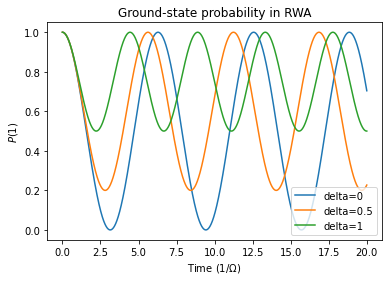

In [25]:
Omega = 1.0 #Rabi freq
delta = [0,0.5,1] #detuning 
#the time−indepdendent hamiltonians
Hs = []
for i in range(len(delta)):
    Hs.append( (delta[i]/2)*qt.sigmaz() - (Omega/2)*qt.sigmax() )

t0 = 0
t1 = 20 
N  = int(1.0E4)
tlist = np.linspace(t0, t1, N)

#expectation values to compute over evolution
proj1 = qt.basis(2,0)*qt.basis(2,0).dag()
e_ops = [ proj1]

## Start from ground state:
psi0 = qt.basis(2,0)

results = []
for i in range(len(delta)):
    results.append(qt.mesolve(Hs[i], psi0 , tlist , c_ops=[], e_ops=e_ops) )

for i in range(len(delta)):
    plt.plot(tlist, results[i].expect[0],'-', label='delta='+str(delta[i]))
plt.xlabel(r'Time ($1/\Omega$)')
plt.ylabel(r'$P(1)$')
plt.legend()
plt.title('Ground-state probability in RWA')
plt.show()

参考 https://zhuanlan.zhihu.com/p/142001362

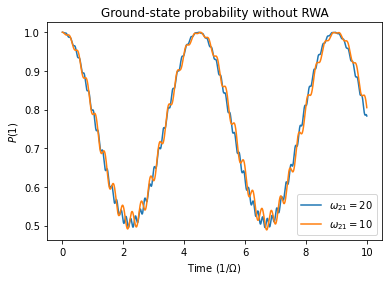

In [48]:
# get time list
t0 = 0
t1 = 10
N  = int(2.0E4)
tlist = np.linspace(t0, t1, N)

# expectation values
proj1 = qt.basis(2,0)*qt.basis(2,0).dag()

# initial state
psi0 = qt.basis(2,0)

# coefficients
omega21 = 20
nu = 21
Omega = 1

# evolution 
H0 = -omega21/2*qt.sigmaz()
H1 = qt.sigmax()
def H1_coeff(t,args):
    return Omega*np.cos(nu*t)
Ht = [H0, [qt.sigmax(), H1_coeff]]

result = qt.mesolve(Ht,psi0,tlist,[],[proj1])

# coefficients
omega21 = 10
nu = 11
Omega = 1

# evolution 
H0 = -omega21/2*qt.sigmaz()
H1 = qt.sigmax()
def H1_coeff(t,args):
    return Omega*np.cos(nu*t)
Ht = [H0, [qt.sigmax(), H1_coeff]]

result2 = qt.mesolve(Ht,psi0,tlist,[],[proj1])


# draw picture
plt.plot(tlist, result.expect[0],'-',label=r'$\omega_{21}=20$')
plt.plot(tlist, result2.expect[0],'-', label=r'$\omega_{21}=10$')

plt.xlabel(r'Time ($1/\Omega$)')
plt.ylabel(r'$P(1)$')
plt.legend()
plt.title('Ground-state probability without RWA')
plt.show()

在不考虑旋波近似的时候，存在短暂的能量不守恒过程，但是仍然满足 $\Delta E\Delta t\ge \hbar/2$，在跃迁概率中体现为波动。

波动的频率与振幅与能级差有关。能级差越小，波动越明显。与失谐关系不大。

### JC-model
$$
\begin{aligned}
    H &= \hbar\nu a^\dagger a + \frac{1}{2}\hbar\omega \sigma_z + \hbar g(a^\dagger + a)(\sigma_++\sigma_-)\\
    H_{RWA} & = \hbar\nu a^\dagger a + \frac{1}{2}\hbar\omega \sigma_z + \hbar g(a^\dagger \sigma_-+a\sigma_+)
\end{aligned}
$$
Suppose $H_0 = \hbar\nu a^\dagger a + \frac{1}{2}\hbar\omega \sigma_z$ and $H_1=\hbar g(a^\dagger \sigma_-+a\sigma_+)$ then, suppose $|\psi_I(t)/\rangle = e^{iH_0 t/\hbar}|\psi_S(t)\rangle$
$$
\begin{aligned}
    H_I &= e^{iH_0 t/\hbar}He^{-iH_0 t/\hbar}-H_0 = e^{iH_0 t/\hbar}H_1e^{-iH_0 t/\hbar} \\
    &= \hbar g(\sigma_+ a e^{i\Delta t}+a^\dagger \sigma_- e^{-i\Delta t})
\end{aligned}
$$
let $|\psi_I(t)\rangle = \sum_{n}[c_{a,n}(t)|a,n\rangle+c_{b,n}(t)|b,n\rangle]$
$$
\begin{pmatrix}
    \dot{c}_{a,n}\\\dot{c}_{b,n+1}
\end{pmatrix} = -i\Omega_{n} \sigma_x
\begin{pmatrix}
    e^{-i\Delta t}c_{a,n}\\ e^{i\Delta t}c_{b,n+1}
\end{pmatrix},\quad \Omega_{n}= g\sqrt{n+1}
$$
the results are:
$$
t_{col} \sim \frac{1}{g},\qquad t_{rev}\sim\frac{2\pi}{g}\bar{n}^{1/2}
$$

### 作业
2. $H = \hbar\nu a^\dagger a+\frac{1}{2}\hbar\omega \sigma_z + hg[\sigma_+an^{1/2}+n^{1/2}a^\dagger \sigma_-]$

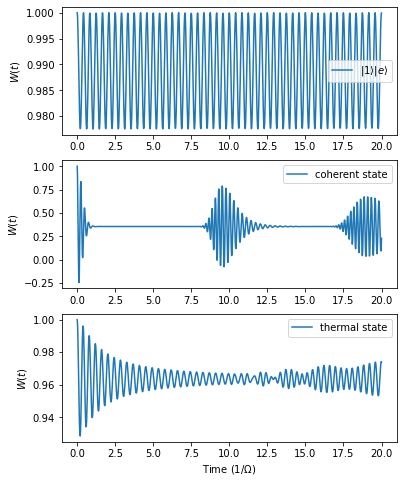

In [49]:
# define cavity operators
N  = 50
a  = qt.tensor(qt.destroy(N), qt.qeye(2))
sqrt_n = qt.tensor(qt.Qobj(np.sqrt((qt.destroy(N).dag()*qt.destroy(N)).data)), qt.qeye(2))
lt = a*sqrt_n
rt = sqrt_n*a.dag()
# define atom operators
sm = qt.tensor(qt.qeye(N), qt.destroy(2)) # sigma_minus
sz = qt.tensor(qt.qeye(N), qt.sigmaz()) # sigma_z
# define projector
proj = -qt.tensor(qt.qeye(N), qt.sigmaz()) 

# define coefficients
wc = 5.0 
wa = 5.0
g  = 0.4

# define Hamitonia with RWA
H = wc*a.dag()*a+ wa*sz + g*(lt*sm.dag()+rt*sm)

# initial state
psi0 = qt.tensor(qt.basis(N,1), qt.basis(2,1))    # start with an excited atom, and Fock state |1>
psi1 = qt.tensor(qt.coherent(N,5), qt.basis(2,1)) # start with an excited atom, and coherent state
psi2 = qt.tensor(qt.thermal_dm(N,2), qt.basis(2,1)*qt.basis(2,1).dag()) # start with an excited atom, and thermal state

# calculate
tlist = np.linspace(0,20,1000)
result0 = qt.mesolve(H,psi0,tlist,[],[proj])
result1 = qt.mesolve(H,psi1,tlist,[],[proj])
result2 = qt.mesolve(H,psi2,tlist,[],[proj])

fig = plt.figure(figsize=(6,8))
fig.tight_layout()

ax0 = plt.subplot(3,1,1)
ax0.plot(tlist, result0.expect[0],'-', label=r'$|1\rangle|e\rangle$')
ax0.set_ylabel(r'$W(t)$')
ax0.legend()

ax1 = plt.subplot(3,1,2)
ax1.plot(tlist, result1.expect[0],'-', label='coherent state')
ax1.set_ylabel(r'$W(t)$')
ax1.legend()

ax2 = plt.subplot(3,1,3)
ax2.plot(tlist, result2.expect[0],'-', label='thermal state')
ax2.set_xlabel(r'Time ($1/\Omega$)')
ax2.set_ylabel(r'$W(t)$')
ax2.legend()

plt.show()

### Theoretical Analysis
$$
\begin{aligned}
    H_0 &= \hbar\nu a^\dagger a+\frac{1}{2}\hbar\omega \sigma_z \\
    H_1 &= hg[\sigma_+an^{1/2}+n^{1/2}a^\dagger \sigma_-] \\
    H_I &= e^{iH_0 t/\hbar}H_1e^{-iH_0 t/\hbar} \\
    &= \hbar g[\sigma_+ a n^{1/2}e^{i\Delta t}+n^{1/2}a^\dagger \sigma_- e^{-i\Delta t}]
\end{aligned}
$$
suppose $|\psi_I(t)\rangle = e^{iH_0 t/\hbar}|\psi_S(t)\rangle = \sum_{n}[c_{a,n}(t)|a,n\rangle+c_{b,n}(t)|b,n\rangle]$
$$
\begin{pmatrix}
    \dot{c}_{a,n}\\ \dot{c}_{b,n+1}
\end{pmatrix} = -i\Omega_n \sigma_x
\begin{pmatrix}
    e^{-i\Delta t} c_{a,n}\\
    e^{i\Delta t} c_{b,n+1}
\end{pmatrix},\quad \Omega_n = g(n+1)
$$
Later samilar with JC model results.

# 第五次作业

### The Lindblad Master equation
$$
\frac{\partial}{\partial t}\rho = \frac{-i}{\hbar}[H,\rho]+\sum_n \frac{1}{2}\Big[2C_n \rho C_n^\dagger-\rho C_n^\dagger C_n - C_n^\dagger C_n\rho\Big]
$$
1. Separability: $\rho_{tot}(0) = \rho(0)\otimes \rho_{env}(0)$
2. Born approximation: $\rho_{tot}(t) \approx \rho(t)\otimes \rho_{env}(0)$
3. Markov approximation: $\tau_{sys}\gg \tau_{env}$
4. Secular approximation: $|\omega_{ab}-\omega_{cd}|\ll 1/\tau_{sys}$  all fast rotating terms in the interaction picture can be neglected

### 作业
1. 单模光场与热库耦合:
   $$
   \begin{aligned}
   \dot{\rho} = \frac{\xi}{2}\bar{n}_{th}(2a^\dagger\rho a-\rho a a^\dagger-aa^\dag
   \rho) + \frac{\xi}{2}(\bar{n}_{th}+1)(2a\rho a^\dagger-\rho a^\dagger a-a^\dag
   a\rho)
   \end{aligned}
   $$
   Therefore, choose $C_0=\sqrt{\frac{\xi}{2}\bar{n}_{th}}\ a^\dagger$, and $C_1=\sqrt{\frac{\xi}{2}(\bar{n}_{th}+1)}\ a$

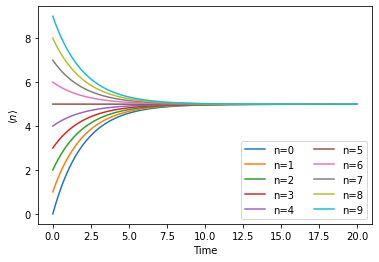

In [64]:
# define cavity operators
N  = 50
a  = qt.destroy(N)

# define projector
mean_n = a.dag()*a


# define coefficent
nth = 5
xi = 1
C0 = np.sqrt(nth*xi/2) * a.dag()
C1 = np.sqrt((nth+1)*xi/2) * a


tlist = np.linspace(0,20,1000)
H0 = qt.qeye(N)

for i in range(10):
    # initiall state
    psi0 = qt.fock_dm(N,i)
    # calculate
    results = qt.mesolve(H0,psi0,tlist,[C0,C1],[mean_n])
    # draw picture
    plt.plot(tlist, results.expect[0], '-' , label='n='+str(i))

plt.xlabel(r'Time')
plt.ylabel(r'$\langle n\rangle$')
plt.legend(loc='lower right' ,ncol=2)
plt.show()